# <u>0) Ensemble des variables à modifier en début d'exécution du Notebook, selon l'exploitation qu'on veut en faire.</u>

In [ ]:
# Booléen d'activation (ou non) de l'installation des modules/librairies nécessaires au bon fonctionnement de ce Notebook (cf partie 1.1) du Notebook).
Installation = False
# Chemin de données (local) vers me répertoire de rangement de la base de donnée initiale, telle que disponible en ligne (cf partie 2) du Notebook).
abs_path_b2d = 'C:/Users/luked/Documents/Formation_Ingenieur_ML/Projets/P2/Ressources_bases2donnees/'
# Nom du fichier dans lequel est enregistré de la base de donnée initiale
title_b2d = 'en.openfoodfacts.org.products.csv'
# Chemin de données (local) vers le repertoire de rangement de la base de donnée finale, après réduction et nettoyage.
# Factuellement, on a choisit de la ranger dans le même répertoire que la base de donnée initiale.
abs_path_b2d_red = abs_path_b2d
# Nom du fichier dans lequel on veut enregistrer la base de donnée finale.
title_b2d_red = 'b2d_reduite_nettoyee.csv'

# 
# <u>1) Installations et importations des libriaries/modules python utiles pour ce Notebbok.</u>
 
## <u>1.1) Installation (sautez cette étape si vous les avez déjà sur votre ordinateur).</u>
### !!! LA LIBRAIRIE MISSINGNO EST DONN2E EN RESSOURCE DE CE PROJET? IL FAUDRA PEUT ËTRE LA METTRE DANS LE MEME REPERTOIRE DE RANGEMENT QUE CE NOTEBOOK !!!
### https://github.com/ResidentMario/missingno

In [ ]:
# Installation conditionnée au booléen précédent
if Installation :
    ! pip install pandas
    ! pip install numpy
    ! pip install missingno


## <u>1.2) Importations.</u>

In [3]:
import pandas as pd
import numpy as np
import missingno as msno 

# 
# <u>2) Chargement de la base de données complète.</u>
## La base de données a été téléchargée manuellement sur https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv. Elle a ensuite été répertoriée en local, mais pas dans le même répertoire que ce notebook.
## !!! Part la suite, on y fera référence sous l'abréviation 'b2d' !!!

In [4]:
# Chargement à proprement parler, sous forme d'un pandas.Dataframe.
df_b2d = pd.read_csv(abs_path_b2d + title_b2d, sep='\t')

C:\Users\luked\anaconda3\envs\virtucon\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,8,13,27,28,29,31,52,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 
# <u>3) Analyse rapide et sommaire de la b2d ainsi chargée.</u>

## <u>3.1) Affichage de la b2d en tant que pandas.Dataframe.</u>
### On affiche le contenu de quelques unes de ses premières lignes, ainsi que son nombre de lignes et de colonnes.

In [5]:
df_b2d.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nb_lign, nb_col = df_b2d.shape[0], df_b2d.shape[1]
print(f'La d2b est un tableau de {nb_lign} lignes et {nb_col} colonnes.')#print('La d2b est un tableau de %i lignes et %i colonnes.'%(nb_lign, nb_col))

La d2b est un tableau de 2017243 lignes et 187 colonnes.


### Elle semble contenir de nombreuses NaN.
### On décompte donc, ci-dessous, combien de colonnes ont une valeur définie pour chacune des 187 lignes, et combien de colonnes sont, au contraires, constituées uniquement de NaN.

In [7]:
nb_col_ss_nan, nb_col_vides = df_b2d.dropna(axis=1, how='any').shape[1], nb_col-df_b2d.dropna(axis=1, how='all').shape[1]
print(f'Seulement {nb_col_ss_nan} colonnes sont systématiquement remplies, et au contraire {nb_col_vides} sont systématiquement vides.')

Seulement 9 colonnes sont systématiquement remplies, et au contraire 39 sont systématiquement vides.


#### 
## <u>3.2) Affichage sous forme d'histogrammes de la densité de chaque colonne.</u>
### On réduit la b2d à ses colonnes non vides.

In [8]:
df_b2d = df_b2d.dropna(axis=1, how='all')

### Et on affiche la densité de remplissage de chaque paramètre restant.

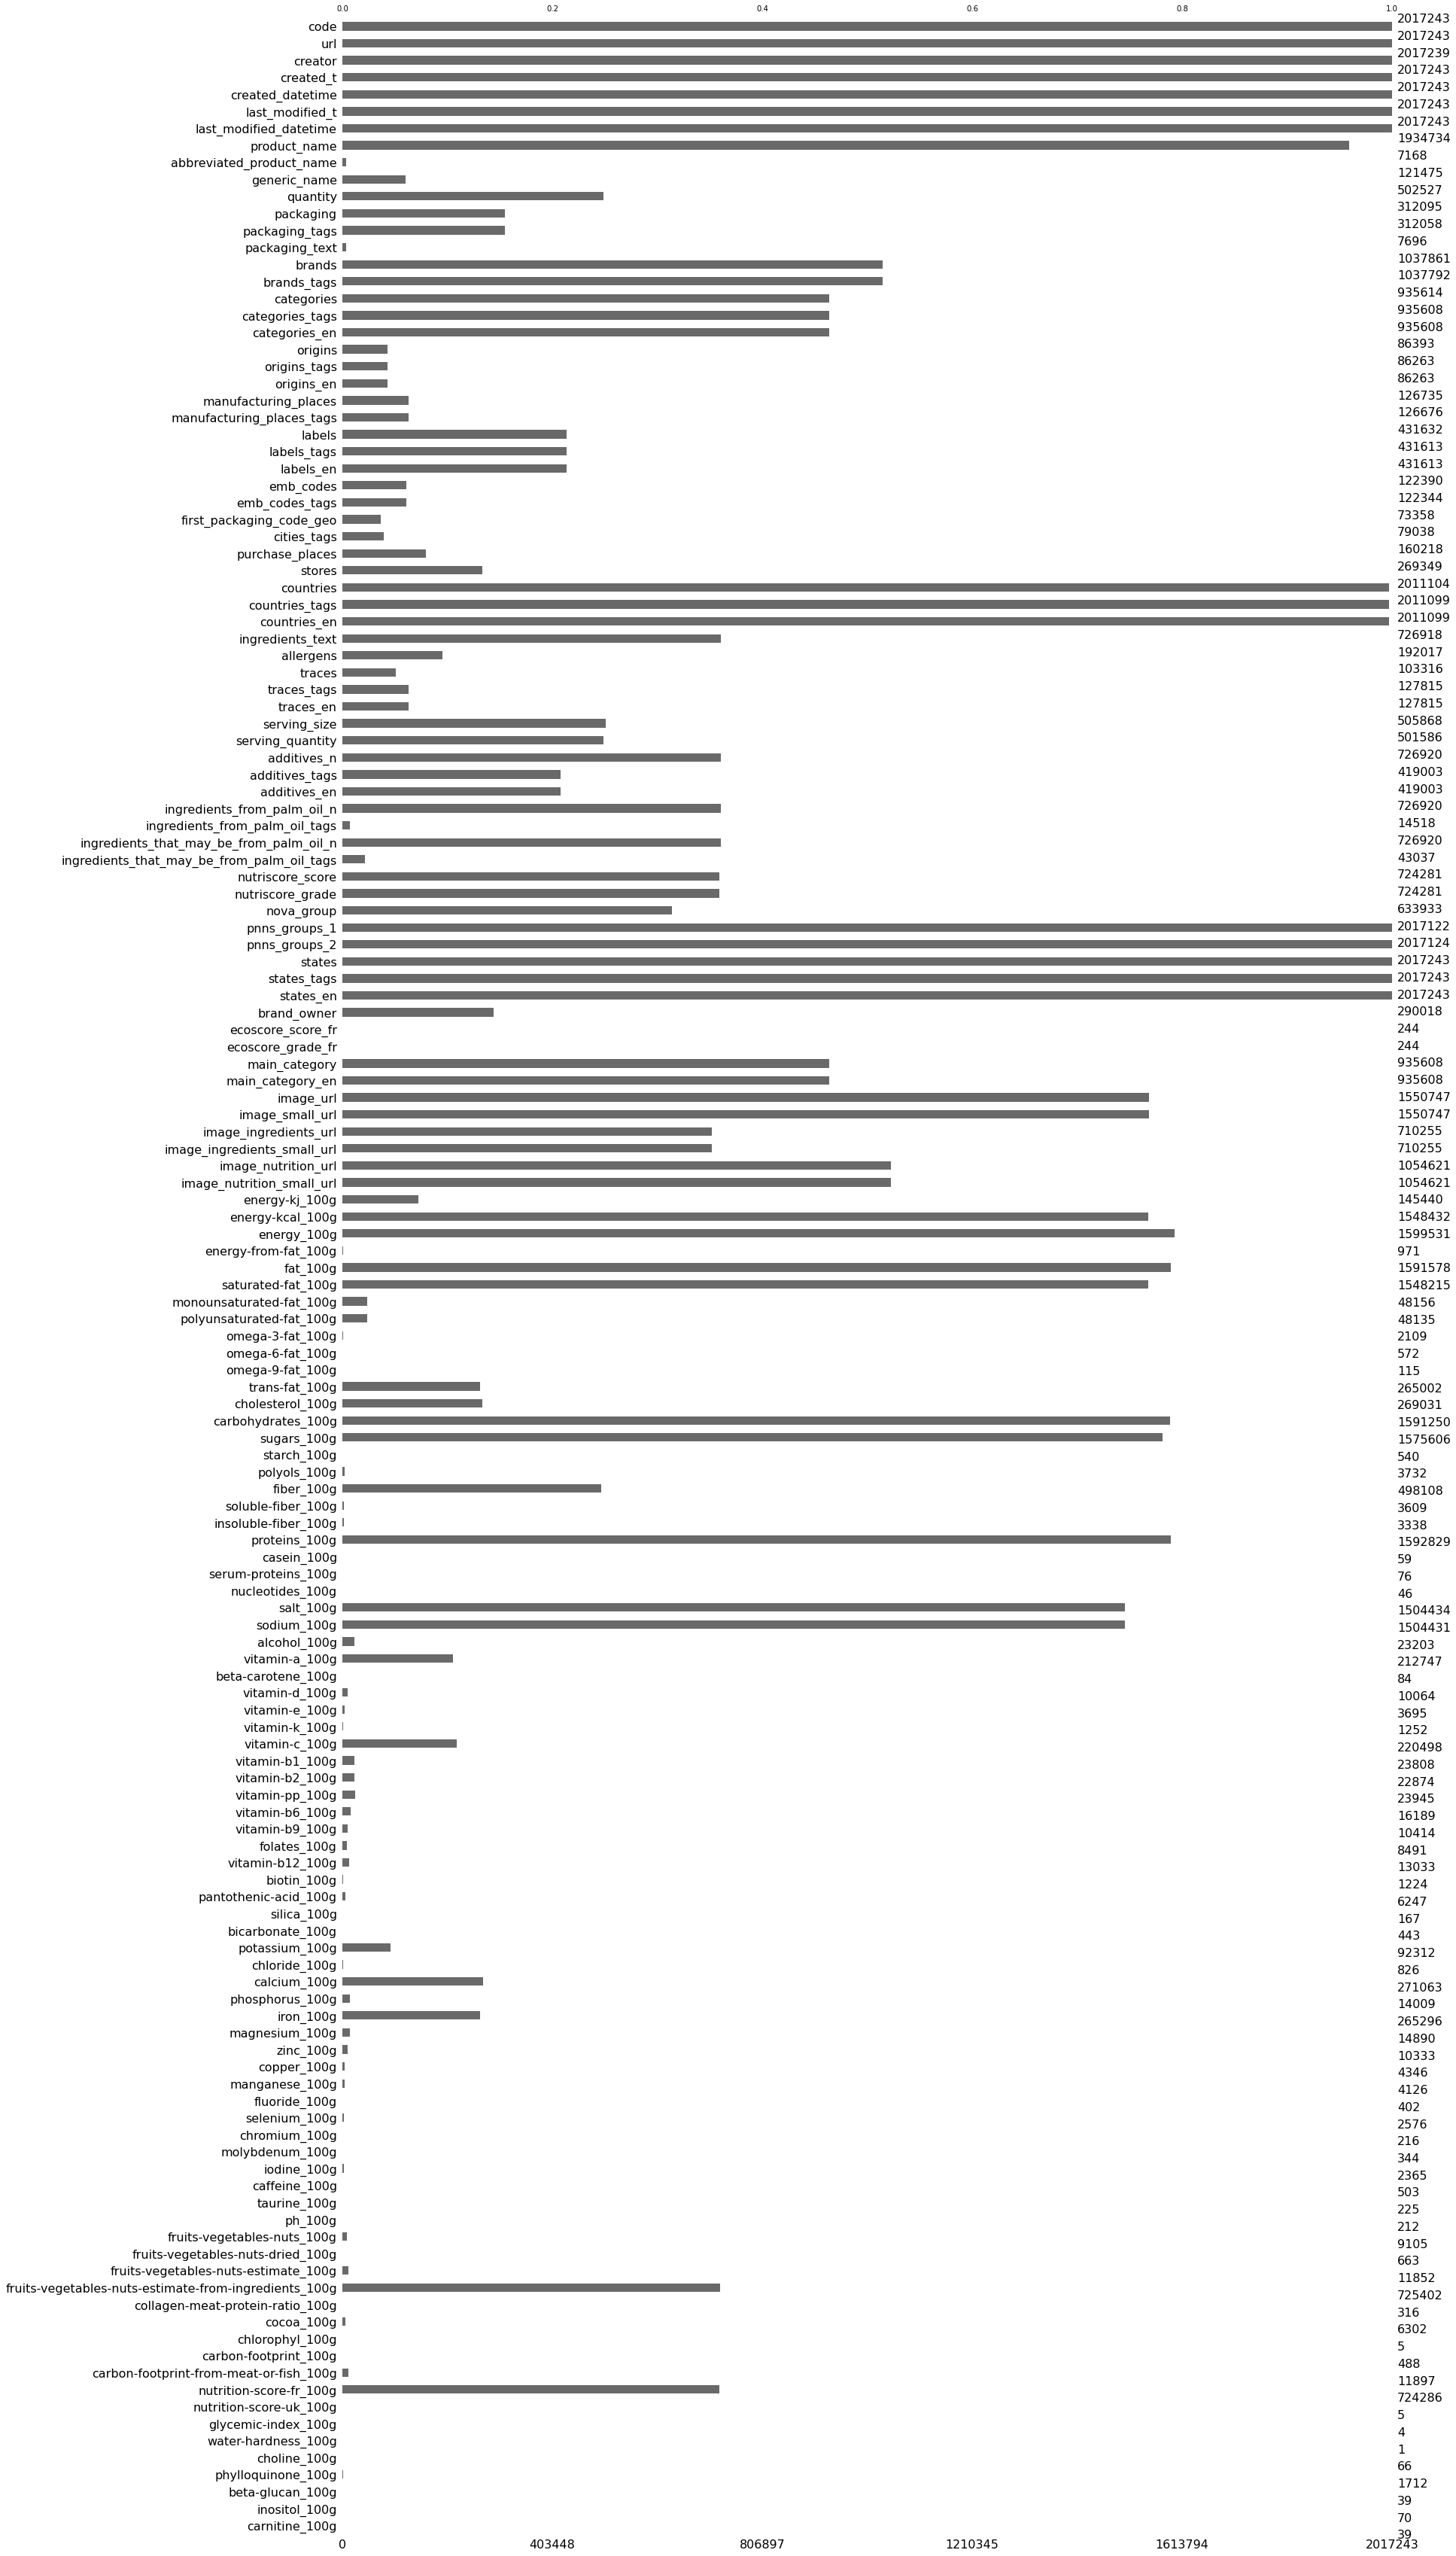

In [9]:
msno.bar(df_b2d[df_b2d.columns[-1::-1]])

### Il demeure néanmoins de nombreux paramètres quasi vides en terme d'occupattion. Il faudra d'ici la fin de ce script en supprimer, ou en regrouper certains afin de produire une base de données réduite et pratique à l'emploi. Il nous faut pour cela savoir ce que l'on recherche.
# 
# <u>4) Analyse et réduction de dimension.</u>

## Notre application se propose de sélectionner des aliments pour constituer trois repas journaliers équilibrés, sains et variés. 
## Plusieurs 'grandes catégrories' de paramètres [des groupes de paramètres semblant contenir des informations similaires/complémentaires] semblent alors sortir du lot de cette b2d :
- un groupe de catégorisation alimentaire ;
- un groupe d'informations nutritives ;
- un groupe de composition alimentaire ;
- un groupe relatif aux quantités alimentaires ;
- et un groupe d'identifiants.

## Cela va constituer notre fil directeur pour le reste du code. Nous allons procéder en parcourant, dans l'ordre des thématiques précédentes, divers groupes de paramètres afin de retenir un nombre restreint d'entre eux, le choix se faisant en focntion :
- de leur densité de remplissage (i.e. d'absence de NaN) ;
- du formatage de l'information en leur sein, en vue de faciliter le travail de l'algorithme de choix sensé régir l'application.

## Un fois le choix fait, on rangera les noms des paramètres choisit dans un tableau, puis on passera à la thématique suivante. L'utilité de ce tableau, remplit au fur et à mesure du script, est de faciliter, à la fin de ce script, la création de la b2d réduite finale.

In [10]:
# Variable pour facilant nos recherches par colonnes
cln = df_b2d.columns
# Initialisation du tableau de rangement des noms de colonnes
tab_param_finaux = []

## 
## <u>4.1) Les paramètres relatif à la catégorisation alimentaire.</u>
### 
### <u>4.1.1) Faisons une rapide recherche des paramètres de la b2d qui contiennent ce genre de renseignements.</u>
### D'après la description de la b2d (https://world.openfoodfacts.org/data/data-fields.txt), on suspecte les paramètres contenant les string 'category(ies)', 'labels' et 'pnns_group' de contenir ce genre d'information. 

In [11]:
# Création d'un dataframe ne contenant que les paramètres correspondant
df_cat = df_b2d[cln[cln.str.contains('categ|label|pnns')]]

### Affichons les premières lignes dépourvues de NaN de ce dataframe, afin de se donner une idée du format des données.

In [12]:
df_cat.dropna(axis=0, how='any').head()

,categories,categories_tags,categories_en,labels,labels_tags,labels_en,pnns_groups_1,pnns_groups_2,main_category,main_category_en
7,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",Delois france,fr:delois-france,fr:delois-france,Fat and sauces,Dressings and sauces,en:mustards,Mustards
93,"Produits à tartiner, Petit-déjeuners, Produits...","en:spreads,en:breakfasts,en:bee-products,en:fa...","Spreads,Breakfasts,Bee products,Farming produc...",Bio,en:organic,Organic,Sugary snacks,Sweets,fr:miels-de-printemps,fr:miels-de-printemps
135,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Bio, Bio européen, AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",Fruits and vegetables,Dried fruits,en:dried-mixed-fruits,Dried mixed fruits
169,Compléments alimentaires,en:dietary-supplements,Dietary supplements,Fabriqué en France,en:made-in-france,Made in France,unknown,unknown,en:dietary-supplements,Dietary supplements
180,"Produits à tartiner, Petit-déjeuners, Produits...","en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Spreads,Breakfasts,Sweet spreads,fr:Pâtes à ta...",en:palm-oil-free,en:no-palm-oil,No palm oil,Sugary snacks,Sweets,fr:pates-a-tartiner,fr:Pâtes à tartiner


### Les formats des paramètres tels que categries_tags, labels_tags et main_category semblent être pratiques en terme de systematisation de recherche d'information. 
### Les renseignements  multiples qu'ils apportent approchent parfois la limite ténue entre "précision" et "trop d'information". En effet, si l'on affiche le nombre de valeurs distinctes que peut contenir chaque paramètre, on obtient :

In [13]:
df_cat.nunique()

categories          114711
categories_tags      71719
categories_en        71719
labels               79204
labels_tags          59376
labels_en            59357
pnns_groups_1           12
pnns_groups_2           42
main_category        32427
main_category_en     32427
dtype: int64

### Les paramètres pnns_groups_1 et 2 ont l'avantage de posséder "peu" de valeurs distinctes par rapport aux autres paramètres, donc de faciliter la catégorisations des produits alimentaires.
### 
### <u>4.1.2) Regardons également la densité de remplissage de ces paramètres :</u>

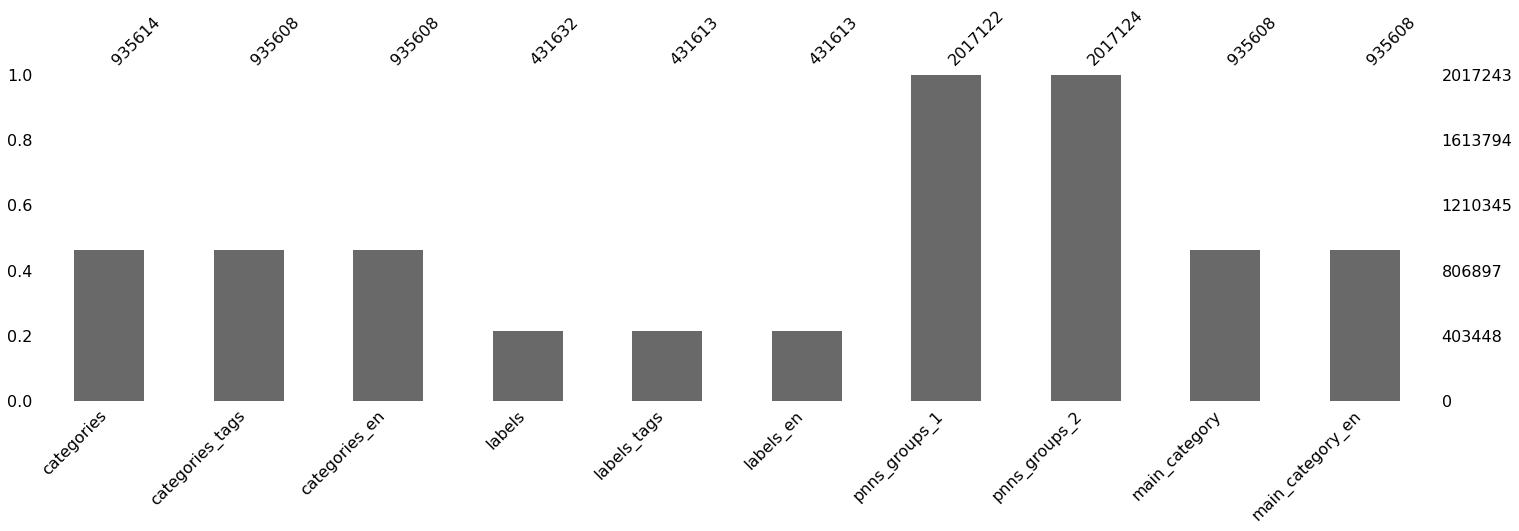

In [14]:
msno.bar(df_b2d[cln[cln.str.contains('categ|labels|pnns')]], figsize=(25,6))

### Les deux paramètres groups_pnns_1 et 2 se distingent, à nouveau, très nettement des autres du fait de leur taux de remplissage, quasiment à 100%.

### 
### <u>4.1.3) Sélections des paramètres intéressants pour l'appli.</u>
### Les deux groupes pnns semblent les plus adaptés : ils prennent relativement peu de valeurs distinctes (facilitant la catégorisation) et possèdent très peu de NaN. On range donc leurs noms dans notre tableau de stockage des paramètres à retenir pour notre application.

In [15]:
for s in ['pnns_groups_1', 'pnns_groups_2'] :
    tab_param_finaux.append(s)

### Ils correspondent à la catégorisation hiererchisée suivante :
- pnns_groups_1 pour les catégories générales,
- pnns_groups_2 pour les sous_catégories.

### (À titre d'information annexe, cette catéhorisation est réglementée et officielle : https://www.mangerbouger.fr/PNNS/Le-PNNS/Qu-est-ce-que-le-PNNS)
### La hiérarchie entre les deux paramètres est la suivante (on affiche pour chaque catégorie générale ses sous-catégories) :

In [16]:
tab = []
for s in df_b2d['pnns_groups_1'].dropna(axis=0).unique():
    df_pnns2_unique = df_b2d['pnns_groups_2'].where(df_b2d['pnns_groups_1']==s).dropna(axis=0).unique()
    tab2=[]
    for i, s2 in enumerate(df_pnns2_unique):
        tab2.append(s2)
    if len(tab2)<8 :
        for i2 in range(8-len(tab2)):
            tab2.append('')
    tab.append(tab2)
d = dict(zip(df_b2d['pnns_groups_1'].dropna(axis=0).unique(), tab))

In [17]:
pd.DataFrame(d)

,unknown,Fat and sauces,Composite foods,Sugary snacks,Fruits and vegetables,Fish Meat Eggs,Beverages,Milk and dairy products,Cereals and potatoes,Salty snacks,Alcoholic beverages,sugary-snacks
0,unknown,Dressings and sauces,One-dish meals,Biscuits and cakes,Fruits,Meat,Sweetened beverages,Cheese,Bread,Salty and fatty products,Alcoholic beverages,pastries
1,,Fats,Pizza pies and quiches,Sweets,Dried fruits,Fish and seafood,Fruit juices,Dairy desserts,Legumes,Nuts,,
2,,,Sandwiches,Pastries,Vegetables,Processed meat,Unsweetened beverages,Milk and yogurt,Cereals,Appetizers,,
3,,,Pizza pies and quiche,Chocolate products,Soups,Eggs,Plant-based milk substitutes,Ice cream,Breakfast cereals,,,
4,,,,,,Offals,Teas and herbal teas and coffees,,Potatoes,,,
5,,,,,,,Artificially sweetened beverages,,,,,
6,,,,,,,Waters and flavored waters,,,,,
7,,,,,,,Fruit nectars,,,,,


### On peut faire plusieurs remarques pour la suite du travail (probablement dans un second script) :
- Le pnns_groups_1 'sugary-snacks' (et ses pnns_2 correspondant) est redondant par rapport à 'Sugary snacks' (en plus de ne pas respecter le format de chaînes de caractères), il faudra fusionner les deux.
- La catégories 'unkown' peut poser problème, il faudra eput être trouver un moyen de lui imputer des valeurs parmis toutes les autres (ainsi qu'à ces pnns_2 'unkownn'), d'autant que ces 2 groupes sont les plus fournis pour chaque paramètre (plus de 50% de chaque pnns_groups) :

In [18]:
df_cat[['pnns_groups_1', 'pnns_groups_2']].describe()

,pnns_groups_1,pnns_groups_2
count,2017122,2017124
unique,12,42
top,unknown,unknown
freq,1254371,1254371


### On peut désormais se pencher sur les paramètres relatifs aux informations nutritives, et leur appliquer les mêmes genres de recherches/traitements. 
### On prend cependant le temps, au passage, d'éliminer les variables qu'on n'utilisera plus par la suite de ce script (afin d'économiser de la mémoire de stockage) :

In [19]:
# Elimination des variables non utilisées par la suite du script (À MODIFIER AU BESOIN/SELON SA VOLONTE)
del df_cat, df_pnns2_unique, tab, tab2, s, s2, i, d

## 
## <u>4.2) Paramètres relatifs aux informations nutritives.</u>
### 
### <u>4.2.1) Faisons une rapide recherche des paramètres de la b2d qui contiennent ce genre de renseignements.</u>
### D'après la description de la b2d (https://world.openfoodfacts.org/data/data-fields.txt), on suspecte les paramètres avec le suffixe '_100g' de contenir ce genre d'information.
### On crée une variable (un pandas.Dataframe) issue de la b2d afin de faciliter nos recherches :

In [20]:
df_100g = df_b2d[cln[cln.str.contains('_100g')]]

### On affiche ses premières lignes dépourvues de NaN (afin de se donner une idée du format des informations qu'elles contiennent).

In [21]:
# Affichage du dataframe correspondant
df_100g.dropna(axis=0, how='any').head()

,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g


### Impressionnant ! Il contient énormément de NaN, au point qu'aucune ligne n'est complète. On comprend dès lors que le principal critère de rétention de paramètres parmis ces 79 'nutrition facts' sera donc la densité de remplissage.
### Soyons moins ambitieux, et affichons malgré tout quelques lignes, en ne retenant que celles qui contiennent au moins une valeur non NaN :

In [22]:
df_100g.dropna(axis=0, how='all').head(10)

,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1,NaN,NaN,NaN,NaN,1.4,0.90,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,685.8,163.9,685.8,NaN,1.9,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,874.9,3661.0,NaN,15.1,6.10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,936.0,NaN,936.0,NaN,8.2,2.20,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,21.0,88.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,60.0,251.0,NaN,3.0,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,63.0,264.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Le format (hors NaN) semble être celui du float, ce qui est logique du fait de la nature des informations contenues dans ces paramètres.
### 
### <u>4.2.2) Regardons dans un premier temps sont les paramètres les plus remplis :</u>
### On fixe arbitrairement un seuil de sélection à 10% de remplissage (i.e. moins de 90% de NaN), ce qui représente encore au moins 200 000 lignes !

Seuls les 18 paramètres suivants (sur 79) respectent un seuil de 10% de remplissage minimimun :


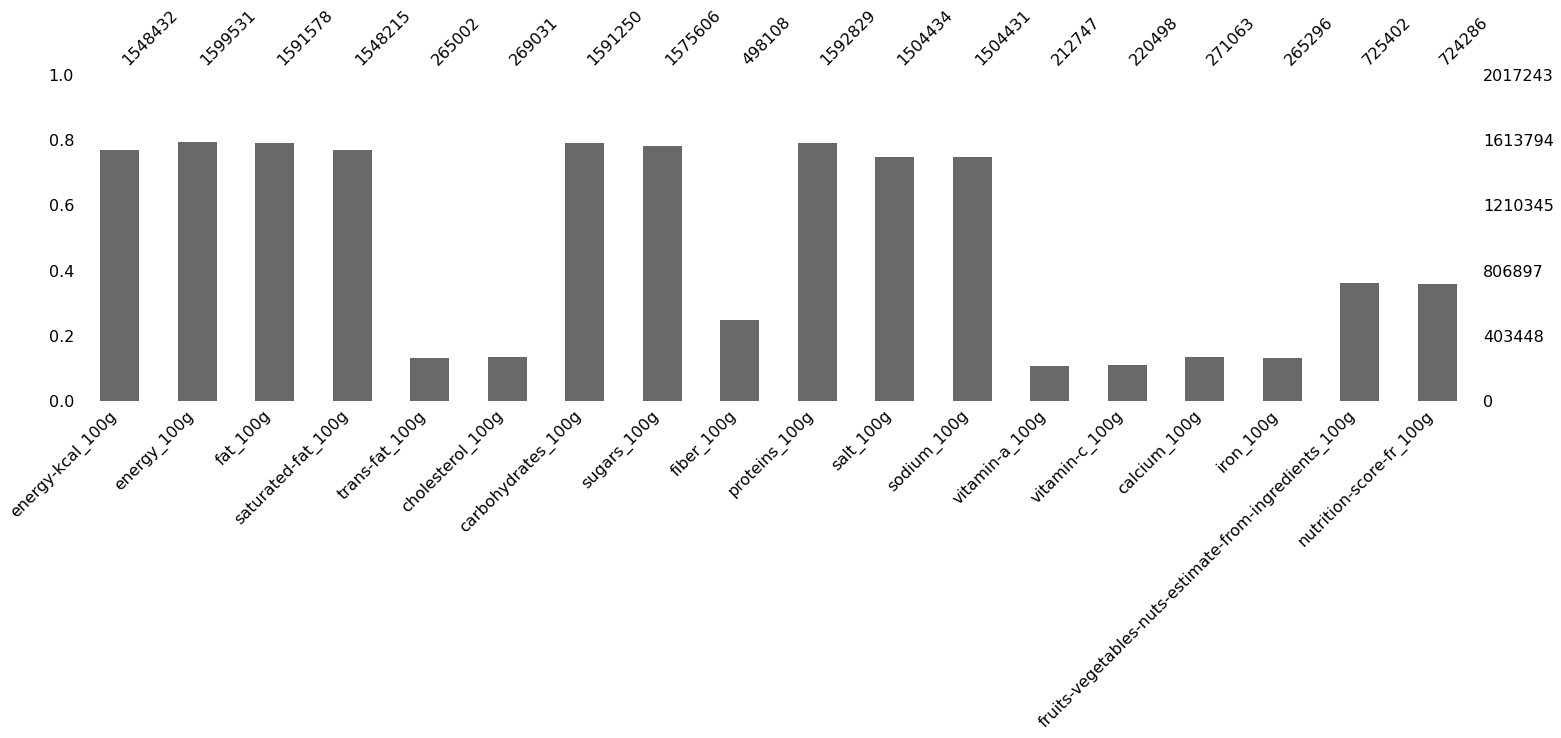

In [23]:
# Seuil de remplissage (MODIFIABLE SELON SA VOLONTE).
seuil_dens = 0.1
# Dont on déduit un nombre minimal de valeurs rensignées (ie : qui ne sont pas des NaN).
nb_min = int(seuil_dens*df_b2d.shape[0])
# Paramètres correspondent à ce taux d'occupation.
clns_seuil = np.array([colonne for colonne in df_100g.columns if df_100g[colonne].count()>=nb_min])
# Affichage des paramètres au dessus de ce seuil, ainsi que de leur densité de remplissage. 
print(f'Seuls les {len(clns_seuil)} paramètres suivants (sur {df_100g.shape[1]}) respectent un seuil de {100*seuil_dens :.0f}% de remplissage minimimun :')
msno.bar(df_100g[clns_seuil], figsize=(25,6))

### Ca semble être une bonne réduction, d'autant que 18 paramètres reste un nombre conséquent.
### On se pose également la question de savoir combien de lignes sont déjà remplies pour chacun de ces paramètres.

In [24]:
# Calcul du nombre de lignes avec au moins une seule valeur non NaN, et du nombre de lignes complètement remplies.
nb_lignes_non_vide, nb_lignes_completes = df_100g[clns_seuil].dropna(axis=0, how='all').shape[0], df_100g[clns_seuil].dropna(axis=0, how='any').shape[0]
print(f'Ce sous dataframe contient {nb_lignes_non_vide} lignes (soit {100*nb_lignes_non_vide/df_100g.shape[0]:.1f}% du total possible) avec au moins un param non vide, et seulement {nb_lignes_completes} lignes ({100*nb_lignes_completes/df_100g.shape[0]:.1f}%) systématiquement remplies.\n')

Ce sous dataframe contient 1701987 lignes (soit 84.4% du total possible) avec au moins un param non vide, et seulement 172427 lignes (8.5%) systématiquement remplies.



### Un peu moins de 8.5% des lignes sont systématiquements remplies, ce qui fait néanmoins plus de 172 000 lignes ! Ca nous laisse une base de donnée réduite honorable.
### Avant de valider la rétention de ces paramètres, il nous faut juste vérifier qu'il n'y a pas redondance entre les paramètres :
- energy_100g et energy-kcal_100g ;
- salt_100g et sodium_100g.

### En effet, ces paramètres semblent aller de paire, du fait :
- de leurs natures similaires ;
- de leurs taux de remplissage extrêmement proches.

### Si jamais on s'apperçoit que ces paramètres sont en réalités équivalents, on pourra n'en conserver qu'un seul sur deux, et donc encore réduitre la dimension de la b2d finale.

####  
### <u>4.2.3) Précautions sur certains couples de paramètres :</u>
#### <u>4.2.3.1) Entre energy_100g et energy-kcal_100g.</u>
### Pourquoi avoir fait cette distinction ? Affichons quelques lignes pour ces deux paramètres :

In [25]:
df_100g[['energy_100g','energy-kcal_100g']].head(10)

,energy_100g,energy-kcal_100g
0,NaN,NaN
1,NaN,NaN
2,1569.0,375.0
3,NaN,NaN
4,685.8,163.9
5,3661.0,874.9
6,NaN,NaN
7,936.0,NaN
8,NaN,NaN
9,88.0,21.0


### Il semble y avoir toujours un même rapport entre les deux, légèrement suppérieur à 4. Hors, la littérature scientifique nous donne le taux de conversion 1 kJ pour (environ) 4.18 kcal
### Cela voudrait dire que l'on pourrait se contenter d'une seule des deux colonnes si :
- le nombre de lignes simultanément remplies est suffisament élevé ;
- le rapport 4.18 reste assez bien respecté entre les deux colonnes lorsque les deux paramètres procurent simultanément une valeur.

### Regardons ce qu'il en est pour le premier point. 

In [26]:
# On crée deux variables répertoriant du comptage de lignes
nb_lignes_completes_energies, max_lignes_possible_energies = df_100g[['energy_100g','energy-kcal_100g']].dropna(axis=0, how='any').shape[0], df_100g[['energy_100g','energy-kcal_100g']].dropna(axis=0, how='all').shape[0]
print(f'Il y a {nb_lignes_completes_energies} lignes simulatnément remplies pour ces deux paramètres (soit {100*nb_lignes_completes_energies/max_lignes_possible_energies:.1f} % du nombre de lignes contenant au moins une valeur non NaN.).')

Il y a 1548432 lignes simulatnément remplies pour ces deux paramètres (soit 96.8 % du nombre de lignes contenant au moins une valeur non NaN.).


### Le premier point est validé. On notera que le nombre de lignes simultanément remplies est exactement égal à celui du nombre de valeurs non NaN prises par le paramètre energy-kcal_100g. 
### Passons au second. Pour cela, on va calculer le rapport entre les valeurs prises par ces deux partamètres, et voir à quel point il est proche de 4.18 pour un grand nombre de lignes.

C:\Users\luked\anaconda3\envs\virtucon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


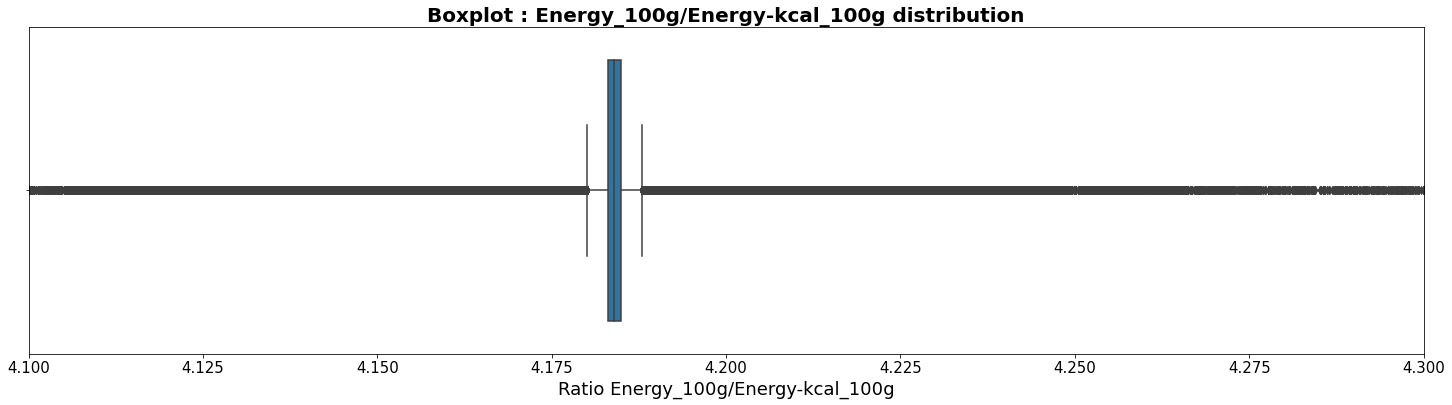

In [27]:
#On créé une pandas.serie des rapportssort_values ces valeurs
df_ratio_energy = df_100g['energy_100g']/df_100g['energy-kcal_100g']
#On affiche la distribution de ces rapports (avec une échelle logarithmique en cas de distribution large)
msno.missingno.plt.figure('boxplot distrib ratio', figsize=(25,6)), msno.missingno.plt.clf()
ax = msno.missingno.sns.boxplot(df_ratio_energy)
msno.missingno.plt.title('Boxplot : Energy_100g/Energy-kcal_100g distribution', fontsize=20, fontweight='bold')
msno.missingno.plt.xlabel('Ratio Energy_100g/Energy-kcal_100g', fontsize=18), msno.missingno.plt.xticks(size=15), msno.missingno.plt.xlim([4.1,4.3])#, msno.missingno.plt.xscale('log')
msno.missingno.plt.show(ax)

### Bien que certains nombres de valeurs soient bien trop supérieures à 4,18 (d'au moins un ordre de grandeurs), il semblerait néanmoins que la plupart d'entre elles respectent ce taux de conversion, en ce situant entre 3,5 et 4,5. Confirmons cette impression par le calcul de quelques centiles de cette distribution :

In [28]:
df_ratio_energy.where(df_ratio_energy!=np.inf).describe([0.01, 0.1, 0.9, 0.99])

count    1.506527e+06
mean     4.322210e+00
std      3.762735e+01
min      0.000000e+00
1%       4.000000e+00
10%      4.180000e+00
50%      4.184000e+00
90%      4.187500e+00
99%      4.250000e+00
max      3.810000e+04
dtype: float64

### On a donc au moins 98% des valeurs non Nan et non infinies qui sont entre 4 et 4.25, ce qui est suffisament satisfaisant !
### Faisons également une petite remarque sur le fait que, sur le diagramme à moustaches précédent, on note la présence d'un certain nombre de valeurs proches de 1, ce qui suggère qu'un petit nombre valeurs du paramètre enregy_100g sont exprimées en kcal ! Ce nombre est toutefois négligeable :

In [29]:
print(f'On a {100*df_ratio_energy.where(df_ratio_energy<=1.5).dropna(axis=0).shape[0]/nb_lignes_completes_energies:.1f}% du nombre de valeurs rensignées pour ces deux paramètres qui sont à peu près égales.')

On a 0.1% du nombre de valeurs rensignées pour ces deux paramètres qui sont à peu près égales.


### En conclusion de cette analyse : on peut donc retenir seulement un des deux paramètres. 
### On choisit de retenir energy-kcal_100g car pour chacune de ses valeurs définies, il existe une valeur définie sur la même ligne pour energy_100g (permettant ainsi la comparaison précédente et la vérification que l'une des deux valeurs n'est pas abhérentae), alors que l'inverse n'est vrai. EN effet, energy_100g possède environ 50000 NaN de moins, soit autant de valeurs pour lesquelles on ne peut pas faire cette vérification).
### A toute fin utile, on note les indices des valeurs cohérente (ie : respectant le taux de conversion), car ce sont celles qu'il faudra conserver pour la b2d finale :

In [30]:
# On se donne un peu de marge par rapport à 4.18 en fixant l'intervalle de confiance à [3,5], car on suspecte que certains valeurs correctement calculées auront été rentrées avec suffisamment peu de décimales pour donner un résultat compris entre 3 et 5
indices_energies= df_ratio_energy.where(np.logical_and(df_ratio_energy<=5, df_ratio_energy>=3)).dropna(axis=0).index

#### 
#### <u>4.2.3.2) Entre salt_100g et sodium_100g.</u>
### Appliquons une démarche similaire pour ces deux paramètres, en commençant par afficher quelques lignes :

In [31]:
df_100g[['salt_100g','sodium_100g']].head(10)

,salt_100g,sodium_100g
0,NaN,NaN
1,0.10,0.040
2,1.40,0.560
3,NaN,NaN
4,1.10,0.440
5,2.10,0.840
6,NaN,NaN
7,4.60,1.840
8,NaN,NaN
9,2.04,0.816


### Il semble y avoir toujours un même rapport entre les deux, d'environ 2,5. Hors, la littérature scientifique nous dit que 2,5 est le rapport entre la masse d'un cristal de chlorure de sodium (soit le composant du sel de table) et d'un atome de sodium.
### Cela voudrait dire que l'on pourrait se contenter d'une seule des deux colonnes si :
- le nombre de lignes simultanément remplies est suffisament élevé ;
- le rapport 2,5 reste assez bien respecté entre les deux colonnes lorsque les deux paramètres procurent simultanément une valeur.

### Regardons ce qu'il en est pour le premier point. 

In [32]:
# On reprend les deux variables répertoriant le comptage de lignes
nb_lignes_completes_sel, max_lignes_possible_sel = df_100g[['salt_100g','sodium_100g']].dropna(axis=0, how='any').shape[0], df_100g[['salt_100g','sodium_100g']].dropna(axis=0, how='all').shape[0]
print(f'Il y a {nb_lignes_completes_sel} lignes simulatnément remplies pour ces deux paramètres (soit {100*nb_lignes_completes_sel/max_lignes_possible_sel:.1f} % du nombre de lignes contenant au moins une valeur non NaN.).')

Il y a 1504431 lignes simulatnément remplies pour ces deux paramètres (soit 100.0 % du nombre de lignes contenant au moins une valeur non NaN.).


### Parfait, elles sont toujours simultanément remplies. Le premier point est donc validé. 
### Passons au second, en reprennant la méthode précédente de calcul des rapports de valeurs, et d'affichage de la distribution des rapports.

C:\Users\luked\anaconda3\envs\virtucon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


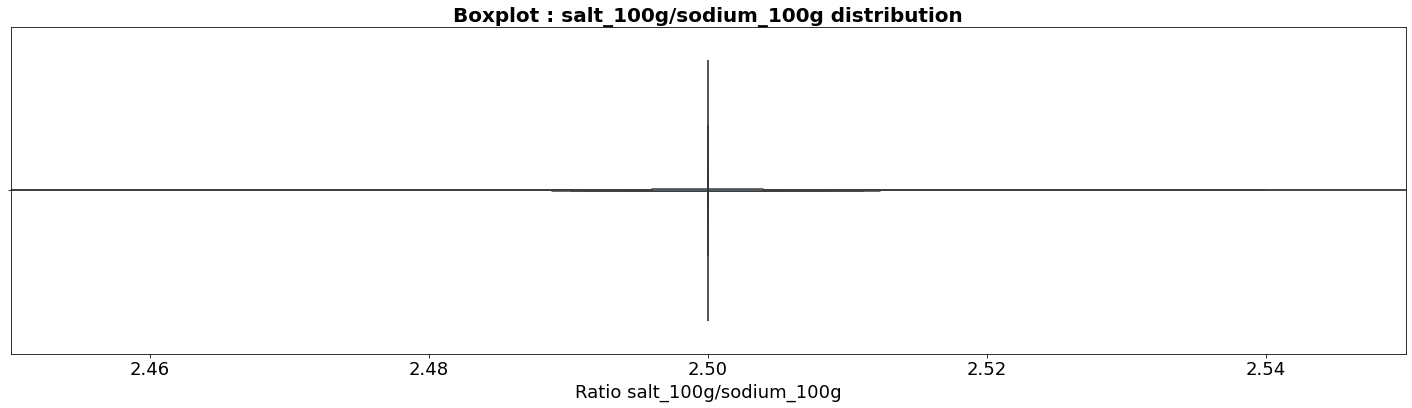

In [33]:
#On créé une pandas.serie des rapports entre ces valeurs
df_ratio_sel = df_100g['salt_100g']/df_100g['sodium_100g']
#On affiche la distribution de ces rapports (avec une échelle logarithmique en cas de distribution large)
msno.missingno.plt.figure('boxplot distrib ratio salt sodium', figsize=(25,6)), msno.missingno.plt.clf()
ax = msno.missingno.sns.boxenplot(df_ratio_sel)
msno.missingno.plt.title('Boxplot : salt_100g/sodium_100g distribution', fontsize=20, fontweight='bold')
msno.missingno.plt.xlabel('Ratio salt_100g/sodium_100g', fontsize=18), msno.missingno.plt.xticks(size=18), msno.missingno.plt.xlim([2.45, 2.55])#msno.missingno.plt.xscale('log')
msno.missingno.plt.show(ax)

### Bien que certains nombres de valeurs soient nettement différentes de 2,5 (jusqu'à un ordre de grandeur), il semblerait néanmoins que l'immense majoriyté d'entre elles respectent ce taux de conversion. Confirmons cette impression par le calcul de quelques centiles de cette distribution :

In [34]:
df_ratio_sel.where(df_ratio_sel!=np.inf).describe([0.01, 0.1, 0.9, 0.99])

count    1.275015e+06
mean     2.500040e+00
std      4.256953e-02
min      0.000000e+00
1%       2.500000e+00
10%      2.500000e+00
50%      2.500000e+00
90%      2.500000e+00
99%      2.500000e+00
max      2.469444e+01
dtype: float64

### On a donc au moins 98% des valeurs non Nan et non infinies qui sont égales à 2,5. C'e qui est suffisament satisfaisant !
### En conclusion, on peut donc retenir un seul paramètre parmis ces deux là. On choisit de retenir sodium_100g plutôt que salt_100g pour les même raisons qui nous avaient amenés à choisir energy-kcal_100g plutôt que energy_100g , bien que cette fois ci, l'écart en nombre de valeurs non NaN soit quasi nul (3 contre environ 50000 quelques lignes plus haut)...
### A toute fin utile, on note les indices des valeurs cohérentes (ie : respectant le rapport de masses), car ce sont celles qu'il faudra conserver pour la b2d finale :

In [35]:
# On se donne un peu de marge par rapport à 2.5 en fixant l'intervalle de confiance à [2,3], car on suspecte que certains valeurs correctement calculées auront été rentrées avec suffisamment peu de décimales pour donner un résultat compris entre 3 et 5
indices_sel= df_ratio_sel.where(np.logical_and(df_ratio_sel<=3, df_ratio_sel>=2)).dropna(axis=0).index

### 
### <u>4.2.4) Rétention des paramètres adaptés à notre applications.</u>

In [36]:
for param in clns_seuil :
    # On retire les deux paramètres identifiés comme redondants
    if param not in ['salt_100g', 'energy_100g']:
        tab_param_finaux.append(param)
# AFfichage du tableau mis à jour 
tab_param_finaux       

['pnns_groups_1',
 'pnns_groups_2',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g']

### Enfin, avant de passer à l'introspection des paramètres relatifs aux quantités, on efface les variables dont on n'aura plus usage par la suite :

In [37]:
del df_100g, df_ratio_energy, df_ratio_sel, nb_lignes_non_vide, nb_lignes_completes, nb_lignes_completes_energies, nb_lignes_completes_sel, max_lignes_possible_energies, max_lignes_possible_sel, clns_seuil, nb_min

## 
## <u>4.3) Paramètres relatifs aux quantités alimentaires.</u>
### 
### <u>4.3.1) Faisons une rapide recherche des paramètres de la b2d qui contiennent ce genre de renseignements.</u>
### D'après la description de la b2d (https://world.openfoodfacts.org/data/data-fields.txt), on suspecte les paramètres 'quantity' et 'serving_size de contenir ce genre d'information. 
### Afin de faciliter nos recherches, on créé un pandas.Datframe issu de la b2d contenant exclusivement ces deux paramètres :

In [38]:
df_qnt = df_b2d[['quantity', 'serving_size']]

### On affiche ses premières lignes dépourvues de NaN (afin de se donner une idée du format des informations qu'elles contiennent).

In [39]:
df_qnt.dropna(axis=0, how='any').head(15)

,quantity,serving_size
169,250 ml,16 ml
343,300g,300 g
345,0.980 kg,100 g
361,1.150 kg,146 g / 1 danoise
367,20 g,serving
389,1.200 kg,150 g / 1 chausson
407,1.008 kg / 12 pain,90 g / 1 pain
427,33 cl e,33 cl
436,1 400 kg,280 g / 1/5 de la Quiche
437,1250 kg,156.5 g / 1/8 du pâté


### Les deux colonnes semblent fonctionner ensemble : 
- quantity a l'air de préciser la quantité totale de produit,
- serving_size aa l'air de préciser la quantité des sous divisions naturelles du produit, i.e. le nombre de part (cf lignes 389, 436, 508, etc).

### On note néanmoins un certains nombre de problèmes :
- il n'y a pas que des masses, il y a aussi des volumes, donc ces valeurs ne peuvent pas fonctionner avec les <i>nutrition facts</i> (exprimés en masse de nutriment par 100 g de produit), à moins qu'une densité volimique ne soit fournie quelquepart ;
- pour une ligne donnée, le rapport entre quantity et serving size ne correspond pas toujours à un entier, donc <i>a priori</i> l'une de ces valeurs pourraient être abhérentes ;
- une même grandeur peut être exprimée sous en plusieurs unités, comme par exemple les masses en g et en kg (cf lignes 345, 389, 508, etc) ;
- le format n'est pas le même d'une ligne à l'autre :
  + l'espace est parfois manquant entre le nombre et l'unité (cf ligne 547)
  + la partie entière et la partie décimale sont séparées parfois par des virgules et non des points (cf ligne 555)

### Il faudra donc veiller à régler ses problèmes de formats, et éliminer les valeurs abhérentes. Néanmoins, assurons nous qu'on a des paramètre suffisament remplis avant de nous lancer dans un processus éliminatif. 
### 
### <u>4.3.2) Analyse du remplissage de ces deux paramètres :</u>
### On affiche leur densité de remplissage :

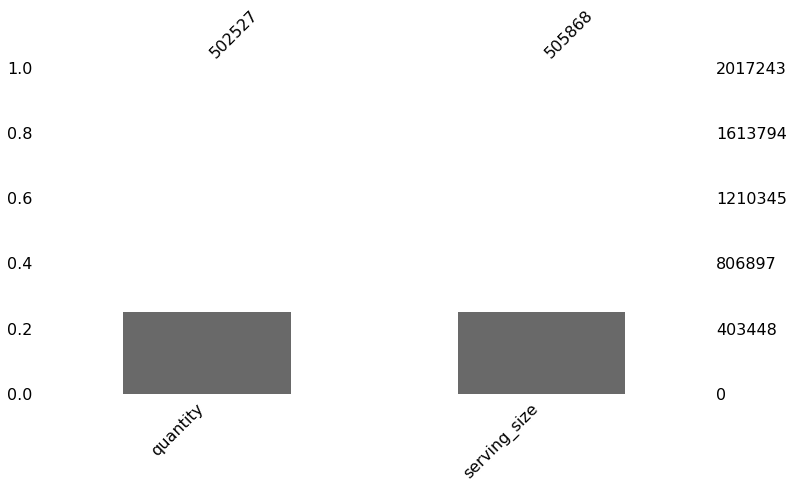

In [40]:
msno.bar(df_qnt, figsize=(12,6))

### Ces paramètres ont un taux de remplissage suffisant, si l'on compare au taux précédent de 10%, mais ils sont néamoins nettement moins remplis que la plupart des autres paramètres déjà retenus. 
### Comme on a déjà fait remarquer que ces paramètres fonctionnaient de façon complémentaire, il faut également s'assurer qu'ils possèdent SIMULTANEMENT suffisamment de valeurs no NaN.
### On affiche donc à ce titre la position des valeurs non NaN pour chacun de ces deux paramètres :

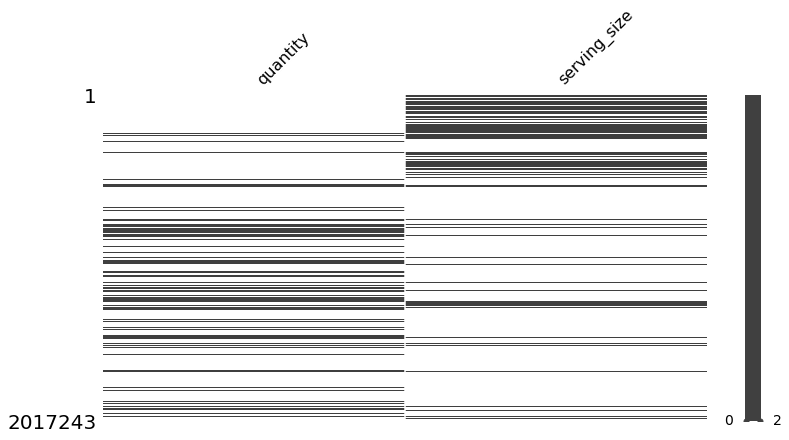

In [41]:
msno.matrix(df_qnt, figsize=(12,6))

### Assez peu de lignes semblent contenir simultanément des valeurs non NaN pour ces deux paramètres.
### On appuie ce graphe par un décompte explicite du nombre de ces lignes :

In [42]:
# On reprend les deux variables répertoriant le comptage de lignes
nb_lignes_completes_qnt, max_lignes_possible_qnt = df_qnt.dropna(axis=0, how='any').shape[0], df_qnt.dropna(axis=0, how='all').shape[0]
print(f'Il y a {nb_lignes_completes_qnt} lignes simulatnément remplies pour ces deux paramètres (soit {100*nb_lignes_completes_qnt/max_lignes_possible_qnt:.1f} % du nombre de lignes contenant au moins une valeur non NaN.).')

Il y a 147971 lignes simulatnément remplies pour ces deux paramètres (soit 17.2 % du nombre de lignes contenant au moins une valeur non NaN.).


### C'est vraiment très peu. On n'a donc pas d'autre choix que de devoir conserver ces deux paramètres (et non un seul parmis deux comme on a réussi à la faire plus haut pour d'autres couples de paramètres). Mais on prend le risque de ne pas pouvoir souvent vérifier si ces valeurs sont aberrantes ou non.
### 
### <u>4.3.3) Rétention des paramètres.</u>
### On ajoute ces paramètres au tableau de rangement.

In [43]:
tab_param_finaux.append('quantity')
tab_param_finaux.append('serving_size')
# Affichage du tableau mis à jour :
tab_param_finaux

['pnns_groups_1',
 'pnns_groups_2',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g',
 'quantity',
 'serving_size']

### Enfin, on élimine les variables dont on n'aura plus usage par la suite.

In [44]:
del nb_lignes_completes_qnt, max_lignes_possible_qnt, df_qnt

## 
## <u>4.4) Paramètres relatifs aux identifiants.</u>
### 
### <u>4.4.1) Faisons une rapide recherche des paramètres de la b2d qui contiennent ce genre de renseignements.</u>
### D'après la description de la b2d (https://world.openfoodfacts.org/data/data-fields.txt), on suspecte des paramètres tels que 'code', 'url', 'product_name' ou encore 'image_url' de contenir ce genre d'information. 
### Afin de faciliter nos recherches, on créé un pandas.Datframe issu de la b2d contenant exclusivement ces deux paramètres :

In [45]:
df_idtf = df_b2d[['code', 'url', 'product_name','image_url']]

### On affiche quelques lignes de ce dataframe :

In [46]:
df_idtf.head(10)

,code,url,product_name,image_url
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,jeunes pousses,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,L.casei,https://images.openfoodfacts.org/images/produc...
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,Vitória crackers,https://images.openfoodfacts.org/images/produc...
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,Cacao,https://images.openfoodfacts.org/images/produc...
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,Filetes de pollo empanado,https://images.openfoodfacts.org/images/produc...
5,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,Hamburguesas de ternera 100%,https://images.openfoodfacts.org/images/produc...
6,00000000001,http://world-en.openfoodfacts.org/product/0000...,hyde icon,NaN
7,0000000000100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,https://images.openfoodfacts.org/images/produc...
8,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,Sfiudwx,NaN
9,0000000000123,http://world-en.openfoodfacts.org/product/0000...,Sauce Sweety chili 0%,https://images.openfoodfacts.org/images/produc...


### Ces paramètres, constiués de chaînes de caractères, peuvent fonctionner de façon complémentaires. Du point de vue de l'utilisateur de l'application, le moins pratique à utiliser est sûrement le paramètre code, alors qu'une combinaison des trois autres paramètres serait très certainement facilement utilisable. 
### Il nous faut cependant vérifier que ces paramètres sont suffisamment remplis.
### 
### <u>4.4.2) Analyse du remplissage de ces deux paramètres :</u>
### On affiche leur densité de remplissage :

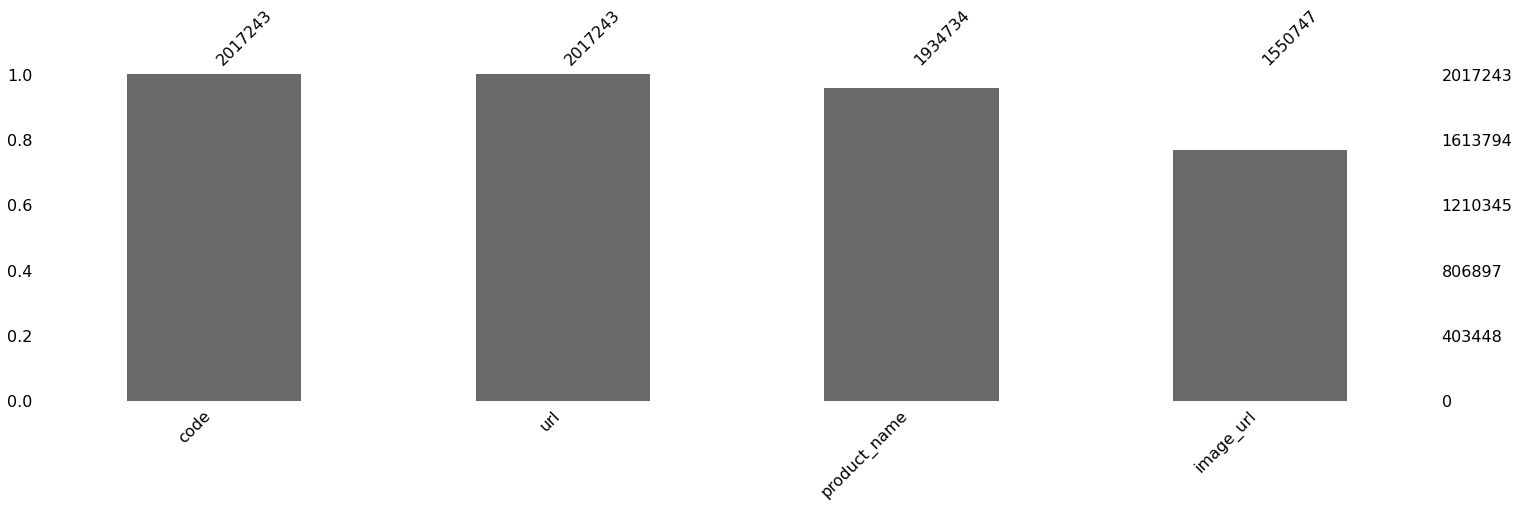

In [47]:
msno.bar(df_idtf, figsize=(25,6))

### Le paramètre url est entièrement rempli, il peut donc être sélectionné comme identifiant. Product_name et image_irl sont un peu moins rempli, ils peuvent donc être retenus, mais ils ne seront utilisés par l'algorithme de l'application uniquement en complément de l'information fournie par le paramètre url.
### 
### <u>4.4.3) Rétention des parmètres.</u>
### On ajoute donc ces paramètres au tableau de rangement :

In [48]:
for s in ['url', 'product_name','image_url'] :
    tab_param_finaux.append(s)
# Affichae du tableau mis à jour
tab_param_finaux

['pnns_groups_1',
 'pnns_groups_2',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g',
 'quantity',
 'serving_size',
 'url',
 'product_name',
 'image_url']

### Enfin, on élimine les variables dont on n'a plus besoin d'ici à la fin du script :

In [49]:
del s, df_idtf

# 
# <u>5) Création, nettoyage et sauvegarde de la base de donnée réduite.</u>
## 
## <u>5.1) Création de la b2d réduite.</u>
### On créé un pandas.Dataframe ne contenant que les paramètres retenus au fil de ce code :

In [50]:
df_b2d_reduite = df_b2d[tab_param_finaux]

## 
## <u>5.2) Nettoyage de la b2d réduite.</u>
### 
### <u>5.2.1) Exclusions des lignes ne respectant pas les rapports de conversion kJ/kcal et masse_sel/masse_sodium :</u>
### On ne retient que les lignes pour lesquelles il y avait respect des rapport kJ/kcal et masse_sel/masse_sodium, grâces aux indices que l'on avait comptabilisés à cet effet (cf section 4.2.3)). 
### On crée donc un pandas.Dataframe ne contenant que les indices à l'intersection des deux listes d'indices précédents.

In [51]:
# Liste des indices à l'intersection des indices précédents
indices = np.intersect1d(indices_energies, indices_sel)
# Création du pandas.Dataframe correspondant à la b2d réduite ET nettoyée
df_b2d_reduite_nettoyée = df_b2d_reduite.iloc[indices]
print(f'La b2d réduite est nettoyée contient encore {df_b2d_reduite_nettoyée.shape[0]} lignes, soit {100*df_b2d_reduite_nettoyée.shape[0]/df_b2d.shape[0]:.1f}% du total de la b2d initiale.')

La b2d réduite est nettoyée contient encore 1208596 lignes, soit 59.9% du total de la b2d initiale.


### Quasiment 60% des lignes de la b2d initiales sont conservées malgré tout, ce qui nous laisse une b2d réduite et nettoyée de taille encore honorable !
### 
### <u>5.2.2)Exclusions de certaines valeurs abhérentes des <i>nutrition facts</i>:</u>
### Il nous faut par ailleurs -ce qu'on avait oublié de faire en section 4.2.3))- éliminer encore plusieurs valeurs abhérentes, en particulier au sein de nos nutrion facts, qui vont constituer la ressource essentielle des valeurs numériques de notre application. Ainsi :
- les paramètres exprimés en masse de nutriment [ie : protéine, sodium, vitamine, etc] pour 100g de produit ne peuvent pas recouvrir une valeure inférieures à 0, ni suppérieure à 100 ;
- le paramètre enrgy-kcal_100g ne peut pas être négatif ; 
- par ailleurs, les besoin d'un adulte étant de 2000-2500 kcal/jour, un conçoit mal que 100g de n'importe produit alimentaire puisse faire plusieurs milliers de kcal (pour mémoire, mêmes les huiles végétales les plus caloriques émargent à environ 900 kcal/100g) : on décide donc par précaution de ne retenir que les valeurs supérieures à 1000 kcal/100g ;
- enfin, le mode de calcule du nutriscore fait que nutrition-score-fr_100g ne peut prendre que des valeurs comprises entre -15 et 40 (https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/)

### Nous allons donc ne retenir que les valeurs des précédents paramètres respectant les intervalles définies/présentées ci-dessus.
### On commence cependant par évaluer le pourcentage de ces valeurs abhérentes au sein de celles prises par ces paramètres, afin d'avoir une idée de l'impact sur la densité de remplissage de la b2d. D'abord au sein des nutrition facts :

In [52]:
# Tableau des colonnes de la b2d réduite :
cln_red = df_b2d_reduite_nettoyée.columns
# Pour les nutritions facts, on crée un sous-dataframe restreint aux seuls paralmètres exprimés en masse de nutriment / 100 g de produit
df_nutritionfacts = df_b2d_reduite_nettoyée[cln_red[cln_red.str.contains('_100g')][1:-1]]
# On affiche le pourcentage de valeurs aberrantes pour ces paramètres (celles hors de l'intervalles [0 ; 100])
print('Pourcentage de valeurs aberrantes pour les nutrition facts :')
100 * df_nutritionfacts.where(np.logical_or(df_nutritionfacts>100, df_nutritionfacts<0)).count() / df_nutritionfacts.count()

Pourcentage de valeurs aberrantes pour les nutrition facts :


fat_100g                                                 0.002405
saturated-fat_100g                                       0.001684
trans-fat_100g                                           0.005235
cholesterol_100g                                         0.002562
carbohydrates_100g                                       0.006386
sugars_100g                                              0.001917
fiber_100g                                               0.006659
proteins_100g                                            0.002236
sodium_100g                                              0.054443
vitamin-a_100g                                           0.018097
vitamin-c_100g                                           0.000521
calcium_100g                                             0.028020
iron_100g                                                0.002582
fruits-vegetables-nuts-estimate-from-ingredients_100g    0.142841
dtype: float64

### Puis pour les paramètres energy-kcla_100g (d'intervalle de référence [0 ; 1000]) et nutrition-score-fr_100g (d'intervalle [-15 ; 40]) :

In [53]:
# Création des sous-dataframe restreints à ces seuls paramètres :
df_energy, df_nutriscore = df_b2d_reduite_nettoyée['energy-kcal_100g'], df_b2d_reduite_nettoyée['nutrition-score-fr_100g']
# Affichage des taux de valeurs aberrantes respective :
print('Pourcentage de valeurs aberrantes pour energy-kcal_100g et nutrition-score-fr_100g :')
100*df_energy.where(np.logical_or(df_energy>1e3, df_energy<0)).count()/df_energy.count(), 100*df_nutriscore.where(np.logical_or(df_nutriscore>40, df_nutriscore<-15)).count()/df_nutriscore.count()

Pourcentage de valeurs aberrantes pour energy-kcal_100g et nutrition-score-fr_100g :


(0.24863560693565095, 0.0)

### Nous sommes rassurés, ces pourcentages sont très faibles, et même carrément nul pour ce qui est du nutriscore !
### On peut donc supprimer les éléments pour lesquels ces paramètres prennent des valeurs aberrantes sans craintes de vider la b2d :

In [54]:
# On créé les listes d'indices des valeurs aberrantes :
indices_abr_nutrition = df_nutritionfacts.where(np.logical_or(df_nutritionfacts>100, df_nutritionfacts<0)).dropna(axis=0, how='all').index
indices_abr_energy = df_energy.where(np.logical_or(df_energy>1e3, df_energy<0)).dropna(axis=0, how='all').index
# On fait l'union des listes d'indices précédentes (avec unicité des éléments au sein de l'union)
indices_abr = np.union1d(indices_abr_energy, indices_abr_nutrition)
# Suppression des lignes correspondantes :
df_b2d_reduite_nettoyée = df_b2d_reduite_nettoyée.drop(indices_abr, axis=0)

###
### <u>5.2.3)Analyse sommaire de l'impact du netttoyage sur le remplissage de la base de donnée :</u>
### On affiche un graphe de densité de remplissage des paramètres restant, afin de s'assurer qu'aucun d'entre eux n'a été trop déplumé par le nettoyage :

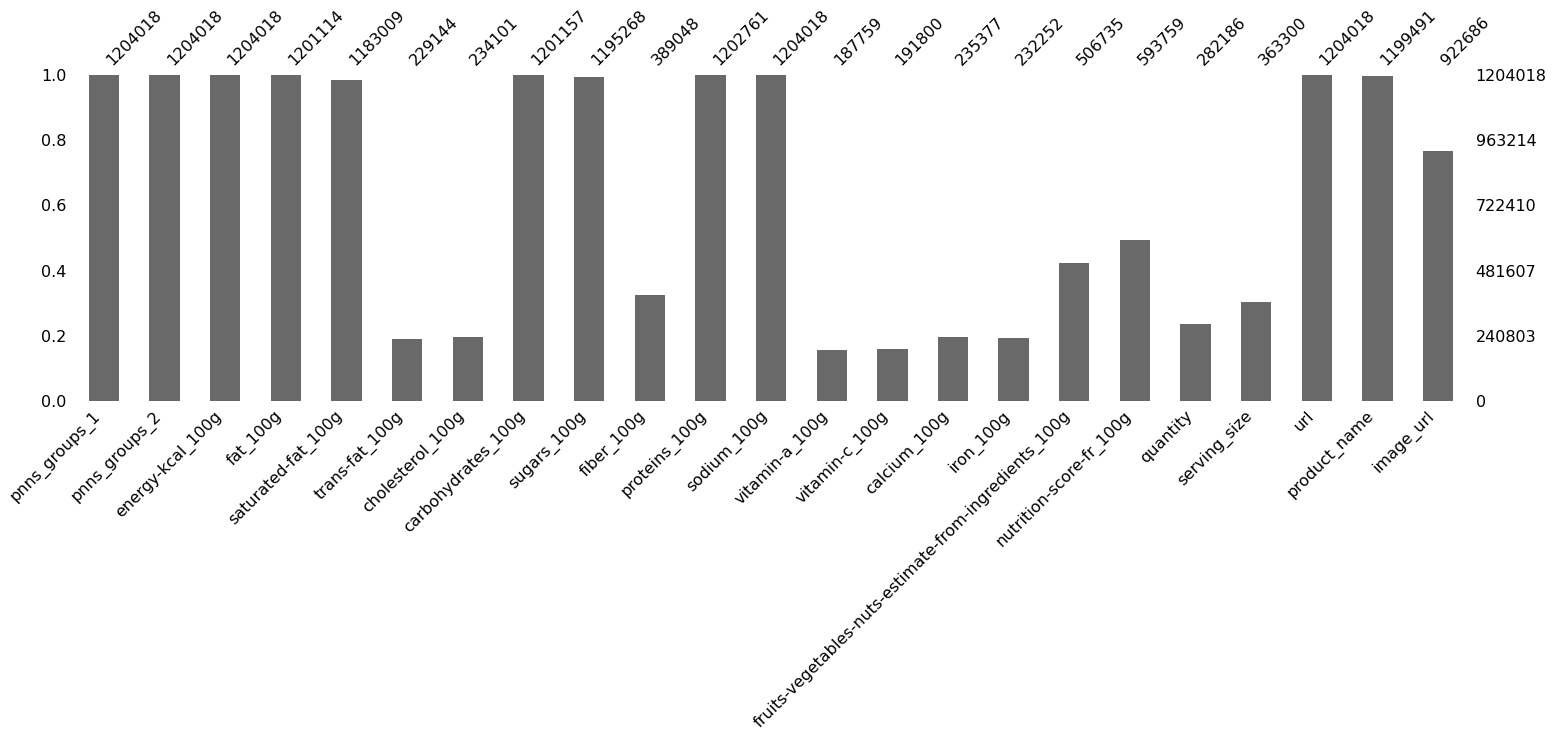

In [55]:
msno.bar(df_b2d_reduite_nettoyée, figsize=(25,6))

### Nous sommes rassurés, le parmaètre le moins rempli affiche néanmoins un taux supérieur à 15% du nombre total de lignes restantes, soit près de 190 000 valeurs non NaN. C'est encore largement suffisant pour réaliser une belle analayse univariée et multivariée, et même de l'imputation.
### Vérifions d'ailleurs si les valeurs de pnns_groups qui ne respectaient pas la mise en forme (pour mémoire : sugary_snacks pour pnns_groups_1) ont été éliminée dans ce processus :

In [56]:
# On affiche les valeurs uniques prises par pnns_groups_1
df_b2d_reduite_nettoyée['pnns_groups_1'].unique()

array(['unknown', 'Composite foods', 'Sugary snacks',
       'Milk and dairy products', 'Fish Meat Eggs',
       'Cereals and potatoes', 'Salty snacks', 'Beverages',
       'Fruits and vegetables', 'Fat and sauces', 'Alcoholic beverages'],
      dtype=object)

### C'est bien le cas. On valide et conserve cette méthode de nettoyage.
### Avant de passer à la sauvegarde de celle-ci, on procède à la suppression de quelques variables créées specifiquement pour les opérations de nettoyage et dont on n'a plus utilité :

In [57]:
del df_energy, df_nutriscore, df_nutritionfacts, indices_abr, indices_abr_energy, indices_abr_nutrition, indices_energies, indices_sel, indices, cln_red

## 
## <u>5.3) Modification du projet et de la b2d réduite.</u>
### Suite à une discussion avec mon mentor, tenant compte :
- de la complexité de cette application, en regard du temps qu'on a prévu de consacrer à ce projet qui n'est que le second sur hui ;
- du nombre important de catégories 'unknown' ;
- d'un travail de prédiction de ces catégories déjà entammé au sein du second Notebook ;

### !!! IL A ETE DECIDE DE MODIFIER LE FIL DIRECTEUR DE L'APPLICATION !!!
### L'application aura désormais pour but de prédire les catégories 'unknwon', c'est à dire attribuer aux individus de cette catégories des groupes pnns 1 et 2 des probabilité de relever en réalité d'au moins une autre catégories de ces groupes. 
### La prédiction se fera sur la base de l'analyse des compositions nutritives des individus, c'est à dire sur les paramètres de type nutrition fact, car ceux-ci sont très nombreux, et de nature à discriminer entre elles des catégories d'aliment.
### 
### De fait, nous devons nous débarrasser, au sein de la b2d réduite, de tous les paramètres autres que :
- pnns_groups_1 et 2
- les 16 nutrition facts (terminant par _100g).

### Nous aurions pû le faire plus tôt dans ce Notebook, mais nous avons préféré laissé les étapes intermédiaires pour laisser une trace écrite de l'ancienne idée de l'application.
### 
### On supprime les colonnes désormais indésirables :

In [63]:
# Initialisation de la liste des colonnes à supprimer :
liste_col_inutiles = []
# on parcours les colonnes
for s in df_b2d_reduite_nettoyée.columns :
    if np.logical_or('pnns'in s, '_100g' in s) :
        print(s,' : à conserver')
    else :
        print(s,' : à retirer de la b2d')
        liste_col_inutiles.append(s)
# On supprime les colonnes de la b2d réduite :
for s in liste_col_inutiles :
    df_b2d_reduite_nettoyée = df_b2d_reduite_nettoyée.drop(columns=s)
# On affiche les colonnes restantes pour contrôler notre travail
df_b2d_reduite_nettoyée.columns

pnns_groups_1  : à conserver
pnns_groups_2  : à conserver
energy-kcal_100g  : à conserver
fat_100g  : à conserver
saturated-fat_100g  : à conserver
trans-fat_100g  : à conserver
cholesterol_100g  : à conserver
carbohydrates_100g  : à conserver
sugars_100g  : à conserver
fiber_100g  : à conserver
proteins_100g  : à conserver
sodium_100g  : à conserver
vitamin-a_100g  : à conserver
vitamin-c_100g  : à conserver
calcium_100g  : à conserver
iron_100g  : à conserver
fruits-vegetables-nuts-estimate-from-ingredients_100g  : à conserver
nutrition-score-fr_100g  : à conserver
quantity  : à retirer de la b2d
serving_size  : à retirer de la b2d
url  : à retirer de la b2d
product_name  : à retirer de la b2d
image_url  : à retirer de la b2d


Index(['pnns_groups_1', 'pnns_groups_2', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

## 
## <u>5.4) Sauvegarde de la b2d réduite.</u>
### On le sauvegarde en local.

In [64]:
# Création du fichier 
df_b2d_reduite_nettoyée.to_csv(abs_path_b2d_red + title_b2d_red, sep='\t')

### On affiche quelques lignes de la base de données réduite et nettoyée :

In [66]:
df_b2d_reduite_nettoyée.head()

,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
2,unknown,unknown,375.0,7.0,3.08,NaN,NaN,70.1,15.0,NaN,7.8,0.560,NaN,NaN,NaN,NaN,NaN,NaN
4,unknown,unknown,163.9,1.9,1.00,NaN,NaN,NaN,NaN,NaN,15.3,0.440,NaN,NaN,NaN,NaN,NaN,NaN
5,unknown,unknown,874.9,15.1,6.10,NaN,NaN,2.6,1.0,NaN,15.7,0.840,NaN,NaN,NaN,NaN,NaN,NaN
9,unknown,unknown,21.0,0.0,0.00,NaN,NaN,4.8,0.4,NaN,0.2,0.816,NaN,NaN,NaN,NaN,NaN,NaN
10,unknown,unknown,60.0,3.0,1.00,NaN,NaN,10.0,3.0,NaN,2.0,0.460,NaN,NaN,NaN,NaN,NaN,NaN


# !!! PRECISIONS IMPORTANTES !!!
### Il demeure encore un grand nombre de NaN.
### Nous précisons nénamoins que nous préférons ne pas nettoyer davantage la base de données afin de conserver une certaine marge de manoeuvre lors du Notebook suivant, pour lequel nousproposerons au moins une solution pour passer outre ce problème.